<a href="https://colab.research.google.com/github/Prachisoni07/ml/blob/main/Pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics mediapipe opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [2]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.52M/6.52M [00:00<00:00, 110MB/s]


In [3]:
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, smooth_landmarks=True)

In [4]:
def process_image(image_path):
    image = cv2.imread(image_path)
    orig_h, orig_w, _ = image.shape
    results = model(image)

    for result in results:
        keypoints = result.keypoints.xy.cpu().numpy()
        mp_results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        for kp in keypoints:
            for x, y in kp:
                cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

        if mp_results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                mp_results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=3, circle_radius=5),
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
            )

    return image


0: 640x512 1 person, 42.1ms
Speed: 15.3ms preprocess, 42.1ms inference, 317.9ms postprocess per image at shape (1, 3, 640, 512)


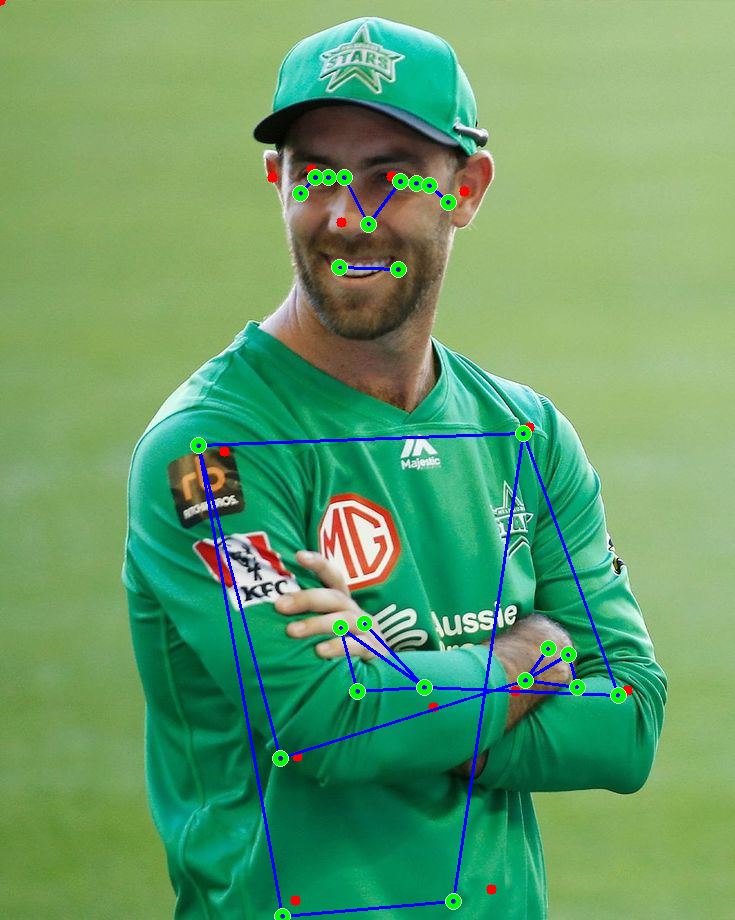

In [5]:
image_path = "/content/maxwell.ml.jpg"
processed_image = process_image(image_path)

from google.colab.patches import cv2_imshow
cv2_imshow(processed_image)

In [6]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
!cd openpose


Cloning into 'openpose'...
remote: Enumerating objects: 16156, done.
remote: Total 16156 (delta 0), reused 0 (delta 0), pack-reused 16156 (from 1)
Receiving objects: 100% (16156/16156), 84.46 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (11322/11322), done.


In [7]:
!apt-get install -y --no-install-recommends \
    build-essential \
    libboost-all-dev \
    libhdf5-serial-dev \
    libgflags-dev \
    libgoogle-glog-dev \
    liblmdb-dev \
    libprotobuf-dev \
    libleveldb-dev \
    libsnappy-dev \
    protobuf-compiler


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
build-essential is already the newest version (12.9ubuntu3).
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
The following additional packages will be installed:
  libgflags2.2 libgoogle-glog0v5 libleveldb1d liblmdb0 libprotobuf-lite23 libunwind-dev
Suggested packages:
  leveldb-doc
Recommended packages:
  lmdb-doc
The following NEW packages will be installed:
  libgflags-dev libgflags2.2 libgoogle-glog-dev libgoogle-glog0v5 libleveldb-dev libleveldb1d
  liblmdb-dev liblmdb0 libprotobuf-dev libprotobuf-lite23 libsnappy-dev libunwind-dev
0 upgraded, 12 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,210 kB of archives.
After this operation, 21.5 MB of addit

In [8]:
!apt-get install -y --no-install-recommends \
    cuda-command-line-tools-11-0 \
    cuda-cublas-dev-11-0 \
    cuda-cudart-dev-11-0 \
    cuda-cupti-dev-11-0 \
    cuda-libraries-dev-11-0 \
    libcudnn8-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package cuda-cudart-dev-11-0 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Unable to locate package cuda-command-line-tools-11-0
E: Unable to locate package cuda-cublas-dev-11-0
E: Package 'cuda-cudart-dev-11-0' has no installation candidate
E: Unable to locate package cuda-cupti-dev-11-0
E: Unable to locate package cuda-libraries-dev-11-0


In [9]:
!cd openpose/build/python
!python setup.py install


/bin/bash: line 1: cd: openpose/build/python: No such file or directory
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [10]:

!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
%cd openpose/

!apt update && apt install -y libopencv-dev python3-opencv cmake


!apt install -y --no-install-recommends libboost-all-dev \
    libhdf5-serial-dev \
    libprotobuf-dev \
    protobuf-compiler \
    libgoogle-glog-dev \
    libgflags-dev \
    libatlas-base-dev \
    libopenblas-dev \
    libleveldb-dev \
    liblmdb-dev \
    libsnappy-dev

!mkdir build
%cd build
!cmake ..
!make -j`nproc`


fatal: destination path 'openpose' already exists and is not an empty directory.
/content/openpose
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,682 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubu

In [11]:
# Go back to the OpenPose directory
%cd /content/openpose

# Download a sample image
!wget -O image.jpg https://i.imgur.com/ZcJgEJD.jpg

# Run OpenPose on the image
!./build/examples/openpose/openpose.bin --image_dir /content/openpose/ --write_images /content/output/ --display 0


/content/openpose
--2025-02-19 11:59:58--  https://i.imgur.com/ZcJgEJD.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 429 Unknown Error
2025-02-19 11:59:58 ERROR 429: Unknown Error.

/bin/bash: line 1: ./build/examples/openpose/openpose.bin: No such file or directory
